In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sys
import random
from sklearn import tree
import pandas.util.testing as tm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test accuracy with Gini Index on test set :  0.8299863076220904
Test accuracy with Entropy on test set :  0.8455043359196713
Maximum Accuracy with criterion =  entropy 

Best depth : 30
Testing Accuracy : 0.8417389319945231


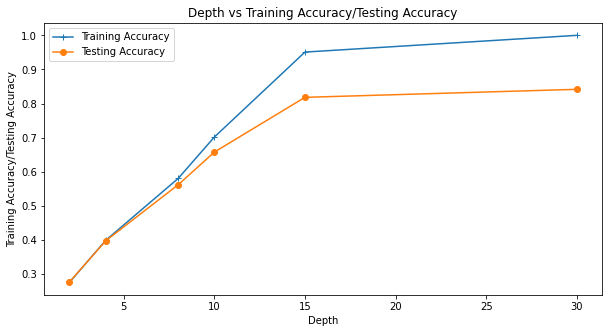

In [4]:
# 3.a

def accuracy(actual,predicted):
    c = 0
    for i in range(min(len(actual),len(predicted))):
        if(actual[i]!=predicted[i]):
            continue
        else:    
            c = c + 1
    return c/len(actual)

def Spilt_DataSet(Data,r): 
    Test_Data = Data.sample(n = int(r*len(Data)))
    Training_Data = pd.concat([Data,Test_Data])
    Training_Data = Training_Data.drop_duplicates(keep=False)

    return Training_Data , Test_Data
    
def datapreprocess(data):
  data.fillna(method ='bfill',inplace=True) 
  null = data.isnull()
  null = null.sum()
  #print(null)

  data = pd.get_dummies(data, columns=['cbwd'])  
  return data  


def Q3_a():
 
  data =  pd.read_csv('/content/drive/My Drive/Projects/ML_Assignment/PRSA_data_2010.1.1-2014.12.31.csv')
  data.drop(columns=['No'],inplace=True,axis=0)
  #data.head()
  
  data = datapreprocess(data)
  Train , Test = Spilt_DataSet(data,0.2)

  X = ['year',	'day'	,'hour','pm2.5'	,'DEWP'	,'TEMP'	,'PRES'	,'Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv']

  dt_gini = DecisionTreeClassifier(criterion='gini')
  dt_gini.fit(Train[X],Train.month)
  pred_cg = dt_gini.predict(Test[X])
  t1 = accuracy(list(pred_cg),list(Test.month))
  print('Test accuracy with Gini Index on test set : ',t1)

  dt_ent = DecisionTreeClassifier(criterion='entropy')
  dt_ent.fit(Train[X],Train.month)
  pred_ce = dt_ent.predict(Test[X])
  t2 = accuracy(list(pred_ce),list(Test.month))
  print('Test accuracy with Entropy on test set : ',t2)
  
  t1 = int(t1*sys.maxsize)
  t2 = int(t2*sys.maxsize) 
 
  x =  max(t1,t2)
  if x == t1:
    x ='gini'
  else:
    x ='entropy'
  return x  

t = Q3_a()
print('Maximum Accuracy with criterion = ',t,'\n')

#3.b

def Q3_b():
  
  data =  pd.read_csv('/content/drive/My Drive/Projects/ML_Assignment/PRSA_data_2010.1.1-2014.12.31.csv')
  data.drop(columns=['No'],inplace=True,axis=0)
  #data.head()
  
  data = datapreprocess(data)
  Train , Test = Spilt_DataSet(data,0.2)

  X = ['year',	'day'	,'hour','pm2.5'	,'DEWP'	,'TEMP'	,'PRES'	,'Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv']

  Hyper = [2, 4, 8, 10, 15, 30]
  scores_train = []
  scores_test = []
  for i in range(len(Hyper)):
    d_t = DecisionTreeClassifier(max_depth=Hyper[i],criterion='entropy',random_state=10)
    d_t.fit(Train[X],Train.month)
    pred_train = d_t.predict(Train[X]) 
    pred_test = d_t.predict(Test[X])
    scores_train.append(accuracy(list(pred_train),list(Train.month)))
    scores_test.append(accuracy(list(pred_test),list(Test.month)))
    
  print('Best depth :',Hyper[scores_test.index(max(scores_test))]) 
  print('Testing Accuracy :',scores_test[scores_test.index(max(scores_test))])
  plt.figure(figsize=(10,5))
  plt.title('Depth vs Training Accuracy/Testing Accuracy')
  plt.plot(Hyper,scores_train,marker='+',label='Training Accuracy')
  plt.plot(Hyper,scores_test,marker='o',label='Testing Accuracy')
  plt.xlabel('Depth')
  plt.ylabel('Training Accuracy/Testing Accuracy')
  plt.legend()
  plt.show()

Q3_b()



In [ ]:
# 3.c

def GetData():
  data =  pd.read_csv('/content/drive/My Drive/Projects/ML_Assignment/PRSA_data_2010.1.1-2014.12.31.csv')
  data.drop(columns=['No'],inplace=True,axis=0)
  #data.head()
  X = ['year',	'day'	,'hour','pm2.5'	,'DEWP'	,'TEMP'	,'PRES'	,'Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv']
  data = datapreprocess(data)
  Train , Test = Spilt_DataSet(data,0.2)
  return Train, Test

def Q3_c(Train,Test,Stumps,Max):
  
  Train_c = Train.copy()
  pred_l = []
  pred_t = []
  X = ['year',	'day'	,'hour','pm2.5'	,'DEWP'	,'TEMP'	,'PRES'	,'Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv']
  for i in range(Stumps):
    Train = Train_c.copy()
    T1 , T2 = Spilt_DataSet(Train , 0.5)
    dt = DecisionTreeClassifier(max_depth = Max,criterion='entropy',random_state=10)
    dt.fit(T1[X],T1.month)

    pred_tr = dt.predict(Train_c[X])
    pred_te = dt.predict(Test[X])
    pred_l.append(pred_te)
    pred_t.append(pred_tr)

  col2 = [str(i) for i in range(len(Test))] 
  col1= [str(i) for i in range(len(Train_c))]  
  pred_tr = pd.DataFrame(pred_t,columns=col1)  # Train 
  pred_d = pd.DataFrame(pred_l,columns=col2)   # Test

  p1 = []
  p2 = []
  for i in col2:
    z = pred_d[i].value_counts().idxmax() 
    p2.append(int(z))

  for i in col1:
    z = pred_tr[i].value_counts().idxmax() 
    p1.append(int(z))
      

  train  = accuracy(list(Train_c.month),p1)
  test  = accuracy(list(Test.month),p2)  

  return([train,test])  


Train , Test = GetData()
l = Q3_c(Train,Test,100,3)
print('Model accuracy with 100 stumps each of depth 3 is : ',l[1])

Model accuracy with 100 stumps each of depth 3 is :  0.34459151072569605


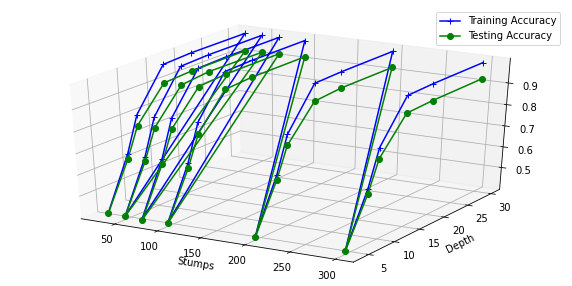

Optimal Value for the number of stumps :  200
Optimal Value for the depth :  20
Testing accuracy :  0.9269739844819717


In [ ]:
# 3.d

def Q3_d():

  Train , Test = GetData()
  Train_c = Train.copy()
  X = ['year',	'day'	,'hour','pm2.5'	,'DEWP'	,'TEMP'	,'PRES'	,'Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv']
  pred_l = []
  
  l = []
  Hyper = [4, 8, 10, 15, 20, 30]
  Stumps = [30, 50, 70, 100, 200 ,300]
  
  for i in range(len(Stumps)):
    for j in range(len(Hyper)):
      t = Q3_c(Train,Test,Stumps[i],Hyper[j])
      l.append([Stumps[i],Hyper[j],t[0],t[1]])
  Data  = pd.DataFrame(l,columns=['Stumps','Depth','Training Accuracy','Testing Accuracy'])
  #print(Data)

  plt.figure(figsize=(10,5))
  p = plt.axes(projection='3d')
  plt.xlabel('Stumps')
  plt.ylabel('Depth')
  p.plot3D(Data['Stumps'],Data['Depth'],Data['Training Accuracy'], 'gray', label='Training Accuracy', marker='+',color='blue')
  p.plot3D(Data['Stumps'],Data['Depth'],Data['Testing Accuracy'], 'gray', label='Testing Accuracy', marker='o',color='green')
  plt.legend()
  plt.show()

  max = Data[Data['Testing Accuracy'] == Data['Testing Accuracy'].max()]
  OD = int(max['Depth'])
  OS = int(max['Stumps'])
  print('Optimal Value for the number of stumps : ',OS)
  print('Optimal Value for the depth : ',OD)
  print('Testing accuracy : ',float(max['Testing Accuracy']))
  
Q3_d()